In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
REBUILD_DATA = True

In [3]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

In [4]:
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  0%|                                                                              | 17/12501 [00:00<01:16, 163.56it/s]

PetImages/Cat


  0%|                                                                              | 16/12501 [00:00<01:21, 153.30it/s]

PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [01:18<00:00, 159.79it/s]
C:\Users\Diego\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470


In [5]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [6]:
print(len(training_data))

24946


In [13]:
print(training_data[2])

[array([[156, 166, 158, ..., 225, 138, 176],
       [175, 189, 139, ..., 137, 159, 116],
       [165, 162, 156, ..., 177, 168, 175],
       ...,
       [166, 174, 163, ..., 153, 144,  91],
       [184, 165, 175, ..., 155, 162, 117],
       [218, 184, 184, ...,  83, 111, 155]], dtype=uint8)
 array([0., 1.])]


In [9]:
import matplotlib.pyplot as plt

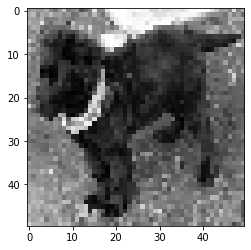

In [16]:
plt.imshow(training_data[2][0], cmap = "gray")
plt.show()

In [18]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#make class
class Net(nn.Module):
    
    #make the init
    def __init__(self):
        
        #then we need the super
        super().__init__()
        
        #start making the layer, the 5 is the kernal size which is the window size
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        #we have to make some random data
        x = torch.randn(50,50).view(-1, 1, 50, 50)
        self.to_linear = None
        self.convs(x)
        
        #we need the linear layer that is the distribution the problem is that you won't know what input in
        #we want this self.fc1 = nn.Linear(-1 ,512)
    
    def convs(self, x):
        
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        
        #x is coming in as a batch of data
        
        if self._to_linear is None:
            self.to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]